In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
df= pd.DataFrame(cancer['data'],columns=cancer['feature_names'],)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df)

StandardScaler()

In [10]:
scaled = scaler.transform(df)

In [11]:
scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled)

In [16]:
df.shape

(569, 30)

In [17]:
x_pca.shape

(569, 2)

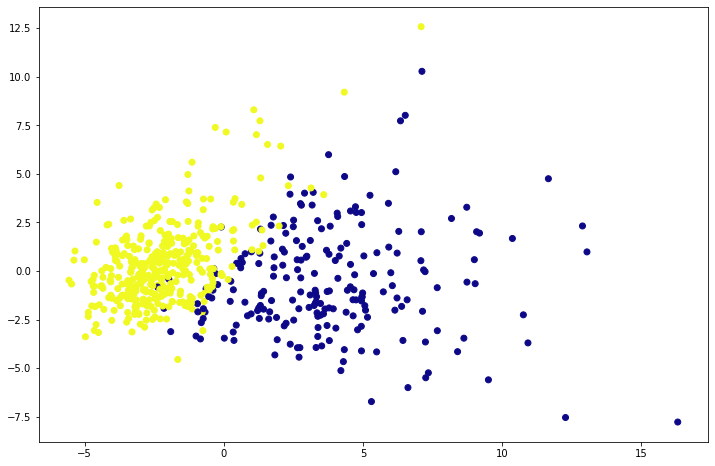

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer['target'], cmap='plasma')

In [19]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [20]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [21]:
dfnew = pd.DataFrame(x_pca, columns=['comp1','comp2'])

In [22]:
dfnew.head()

,comp1,comp2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [24]:
X = dfnew
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
svm = SVC()

In [26]:
svm.fit(X_train,y_train)

SVC()

In [27]:
prd = svm.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        71
           1       0.92      0.97      0.94       100

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
prdlr = lr.predict(X_test)

In [34]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [35]:
abs(prdlr)

array([0.97158164, 0.87905562, 0.80917088, 1.05919867, 0.45652512,
       0.45346682, 0.72278449, 0.8329405 , 0.86749298, 0.96703964,
       0.90100717, 0.8495771 , 0.66416636, 0.59361001, 0.23862719,
       0.08123408, 0.10074725, 0.81568132, 0.1826769 , 0.51385232,
       1.00335089, 0.78661261, 0.93005326, 0.66059013, 0.98130011,
       0.88310486, 1.0053629 , 0.994799  , 0.96678004, 0.63176143,
       0.80015953, 0.29355992, 0.28909268, 0.12583443, 0.58589882,
       0.91495456, 0.11873545, 0.92174013, 0.99542118, 0.81403825,
       0.92023009, 0.9852254 , 0.75722523, 0.88287572, 0.73930181,
       0.46807812, 0.55271071, 0.54187697, 0.33233549, 0.95640609,
       0.16681372, 0.13304719, 0.23090766, 0.18821188, 1.04810254,
       0.40970864, 0.06468054, 0.08107682, 0.69535546, 0.72089421,
       0.03769271, 0.50612495, 0.8353737 , 0.96826124, 0.92282621,
       0.18537666, 0.23951639, 0.10157897, 0.21873027, 1.00354491,
       0.63910871, 0.26783133, 0.16786771, 0.22336763, 0.20048

In [36]:
rprd = np.around(abs(prdlr))

In [37]:
rprd

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [38]:
print(classification_report(y_test,rprd))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        71
           1       0.88      0.99      0.93       100

    accuracy                           0.91       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171

